In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import colors
from skimage.color import rgb2gray, rgb2hsv, hsv2rgb
from skimage.io import imread, imshow
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
import os

In [2]:
metadata = pd.read_csv("./../metadata.csv")
metadata = metadata.query('day == True and snow == True ')
metadata

,path,name,snow,day,node
265,./images/all/1668258019692423953-sample.jpg,1668258019692423953-sample.jpg,True,True,W014
266,./images/all/1668261619815156204-sample.jpg,1668261619815156204-sample.jpg,True,True,W014
267,./images/all/1668265221389059798-sample.jpg,1668265221389059798-sample.jpg,True,True,W014
268,./images/all/1668268820152388507-sample.jpg,1668268820152388507-sample.jpg,True,True,W014
269,./images/all/1668272421912809968-sample.jpg,1668272421912809968-sample.jpg,True,True,W014
...,...,...,...,...,...
2502,./images/all/1682294412807087334-sample.jpg,1682294412807087334-sample.jpg,True,True,W083
2503,./images/all/1682298012298710492-sample.jpg,1682298012298710492-sample.jpg,True,True,W083
2638,./images/all/1682852412008859688-sample.jpg,1682852412008859688-sample.jpg,True,True,W083
2639,./images/all/1682856012549019018-sample.jpg,1682856012549019018-sample.jpg,True,True,W083


In [3]:
def image_to_pandas(image):
    df = pd.DataFrame([image[:,:,0].flatten(),
                       image[:,:,1].flatten(),
                       image[:,:,2].flatten()]).T
    df.columns = ["Red_Channel","Green_Channel","Blue_Channel"]
    return df


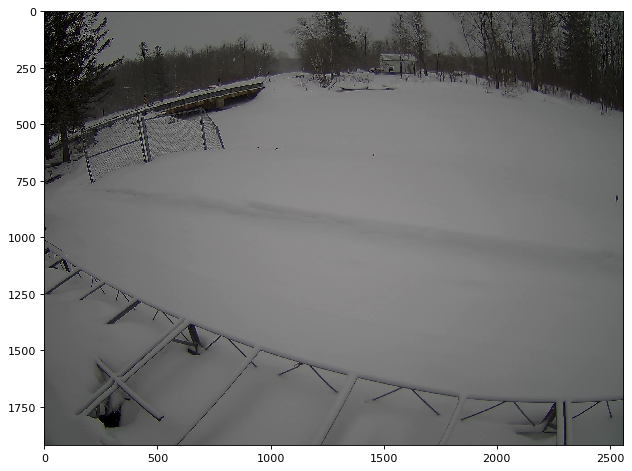

In [4]:
images = []
g_images = []
n = 500
gray = True

for i, (index, row) in enumerate(metadata.sample(1).iterrows()):
        
        path = os.path.join("./../" + row['path'])
        image = imread(path)
        shape = image.shape
        plt.figure(num=None, figsize=(8, 6), dpi=80)
        imshow(image)
        break
        
        


c:\Users\alxto\anaconda3\envs\sage\Lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:149: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


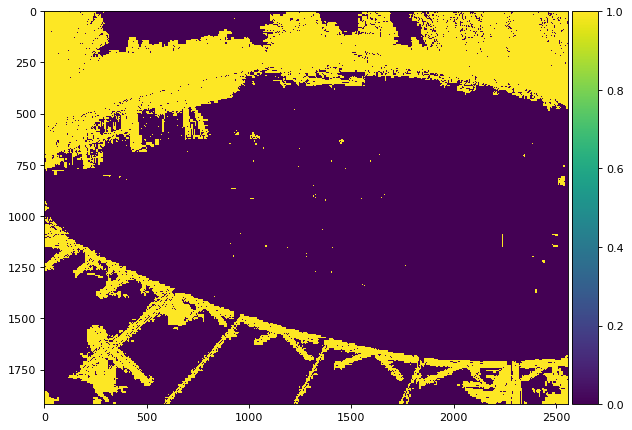

In [5]:
image = image_to_pandas(image)
plt.figure(num=None, figsize=(8, 6), dpi=80)

gmm = GaussianMixture(n_components=  2).fit(image)
result = gmm.predict(image).reshape(shape[:2])
imshow(result, cmap='viridis')
plt.show()
  

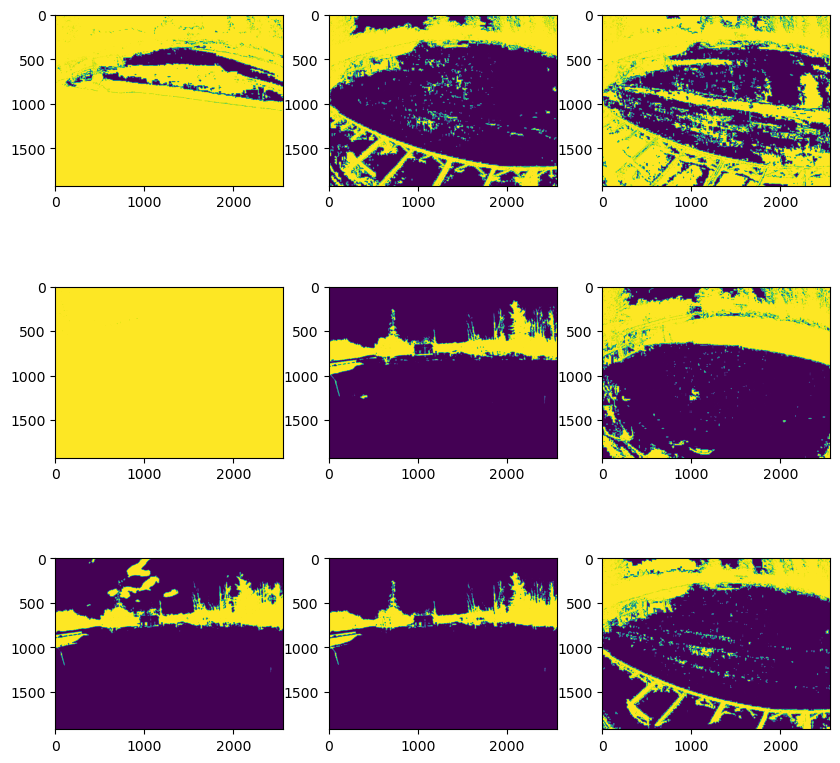

In [15]:
fig, axes = plt.subplots(3, 3, figsize=(10, 10))
rows = metadata.sample(9).reset_index()

for n, ax in enumerate(axes.flatten()):
    path = os.path.join("./../" + rows.loc[n,'path'])
    image = imread(path)
    shape = image.shape
    image = image_to_pandas(image)
    pred = gmm.predict(image).reshape(shape[:2])
    ax.imshow(pred)
plt.show()


In [16]:
fig, axes = plt.subplots(3, 3, figsize=(10, 10))
for n, ax in enumerate(axes.flatten()):
    path = os.path.join("./../" + rows.loc[n,'path'])
    image = imread(path)
    ax.imshow(image)
plt.show()